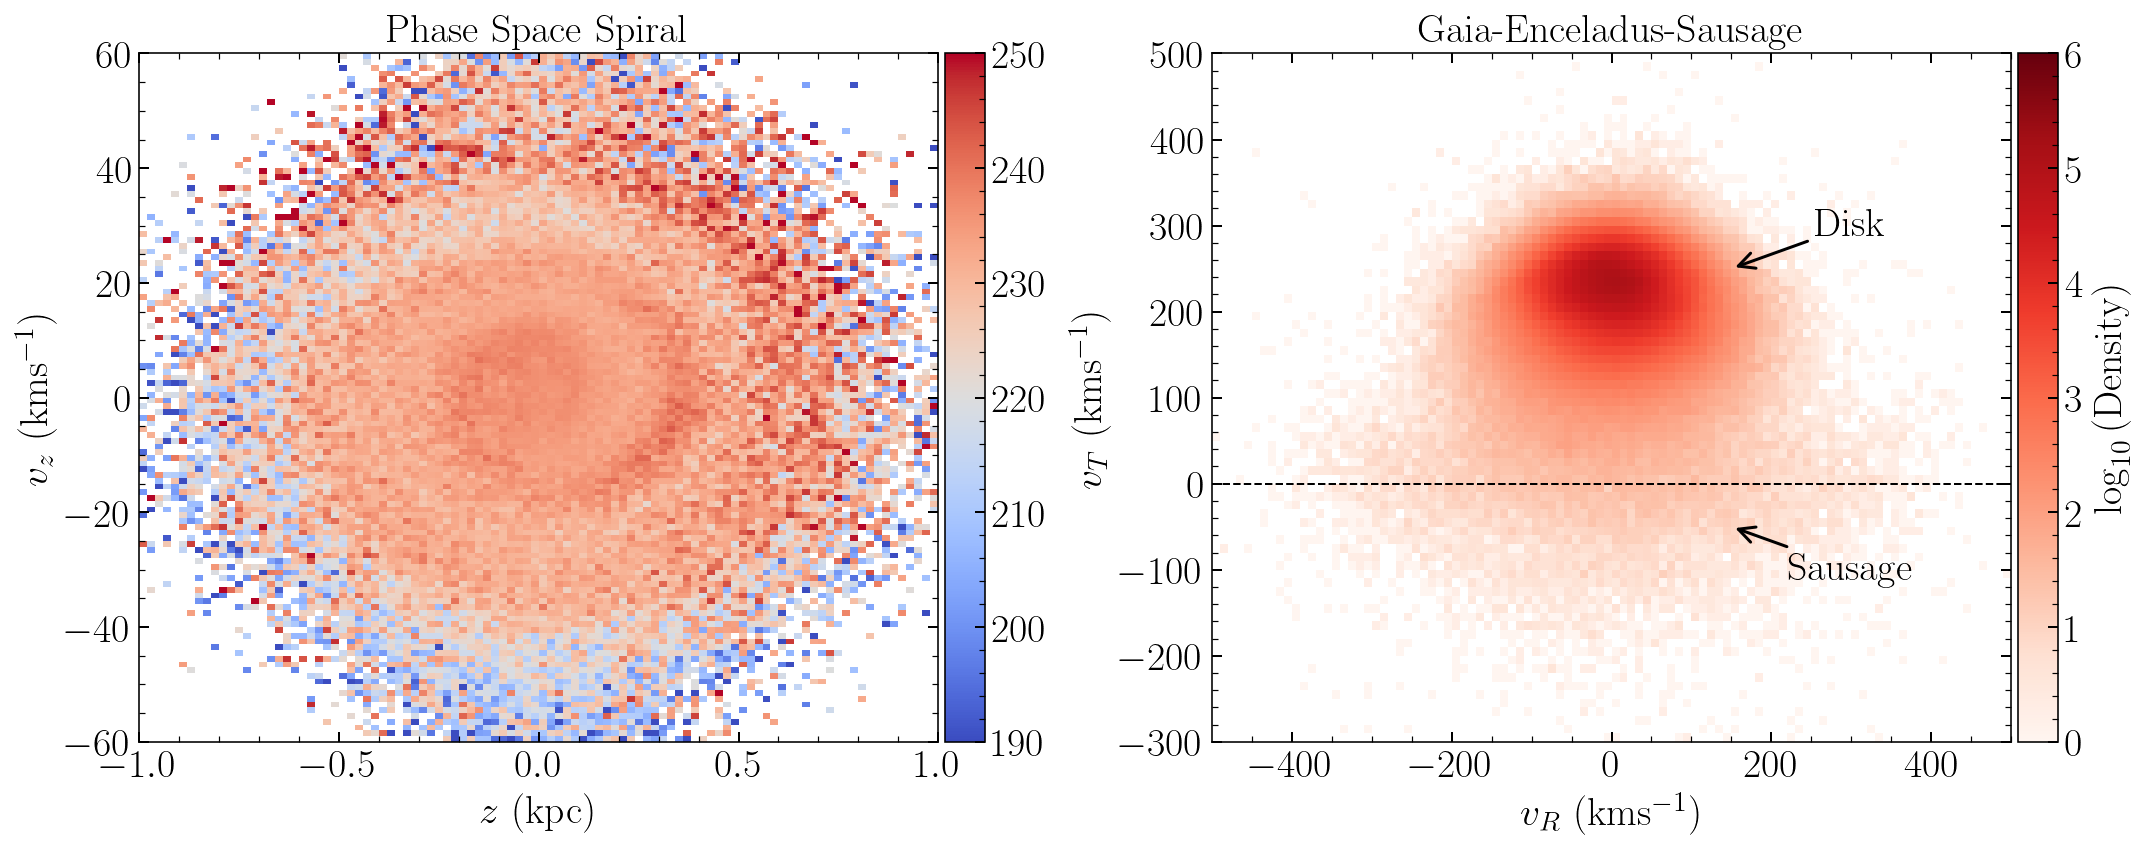

In [1]:
from astroNN.shared.matplotlib import pylab_style
from astropy.io import fits
from galpy.orbit import Orbit
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import binned_statistic_2d

pylab_style(paper=True)

# f = fits.getdata("wilma_tick_sample_edr3.fits")
f = fits.getdata("1634935058934O-result.fits.gz")

r0 = 8.34
v0 = 240.0
z0 = 0.0208

parallax = f["parallax"]
parallax_err = f["parallax_error"]
pmra = f["pmra"]
pmdec = f["pmdec"]
pmra_err = f["pmra_error"]
pmdec_err = f["pmdec_error"]
rv = f["dr2_radial_velocity"]
rv_err = f["dr2_radial_velocity_error"]
good_idx = (
    parallax / parallax_err
    > 5
    # & (parallax < 10.)
    # & (np.abs(pmra) / pmra_err > 10)
    # & (np.abs(pmdec) / pmdec_err > 10)
    # & (np.abs(rv) / rv_err > 10)
)
temp_f = f[good_idx]
# extract gaia info
source_ids = temp_f["source_id"]
parallax = temp_f["parallax"]
ra = temp_f["ra"]
dec = temp_f["dec"]
distance = 1 / parallax
pmra = temp_f["pmra"]
pmdec = temp_f["pmdec"]
rv = temp_f["dr2_radial_velocity"]

vxvv = [ra, dec, distance, pmra, pmdec, rv]
os = Orbit(
    np.array([ra, dec, distance, pmra, pmdec, rv]).T,
    radec=True,
    ro=r0,
    vo=v0,
    zo=z0,
    solarmotion="schoenrich",
)

# from scipy.
z = os.z()
vz = os.vz()
vr = os.vr()
vphi = os.vT()
R = os.R()

good_idx = (z < 1) & (z > -1) & (vz < 60) & (vz > -60) & (R < 8.44) & (R > 8.24)
z = z[good_idx]
vz = vz[good_idx]
vphi = vphi[good_idx]
vr = vr[good_idx]
R = R[good_idx]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

med, xe, ye, binnum = binned_statistic_2d(
    z,
    vz,
    vphi,
    bins=[100, 120],
    range=((-1, 1), (-60, 60)),
    statistic=np.median,
)

counts, xe, ye, binnum = binned_statistic_2d(
    z,
    vz,
    vphi,
    bins=[100, 120],
    range=((-1, 1), (-60, 60)),
    statistic="count",
)

med[counts < 5] = np.nan

# plt.hist2d(z, vz, range=((-1, 1), (-60, 60)), bins=(100, 100))
# plt.scatter(z, vz, c=vphi, s=1)
mappable = ax1.pcolormesh(
    xe,
    ye,
    med.T,
    vmin=190,
    vmax=250,
    cmap="coolwarm",
)
ax1.set_xlim(-1, 1)
ax1.set_ylim(-60, 60)
ax1.set_title("Phase Space Spiral")
ax1.set_xlabel(r"$z\ (\mathrm{kpc})$")
ax1.set_ylabel(r"$v_z\ (\mathrm{km s^{-1}})$")
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax, mappable=mappable)
cbar.ax.tick_params()
# cbar.set_label(r"$v_T\ (\mathrm{km s^{-1}})$")

# from scipy.
z = os.z()
vz = os.vz()
vr = os.vr()
vphi = os.vT()
R = os.R()

good_idx = (z < 1) & (z > -1) & (vz < 60) & (vz > -60)
z = z[good_idx]
vz = vz[good_idx]
vphi = vphi[good_idx]
vr = vr[good_idx]
R = R[good_idx]


med, xe, ye, binnum = binned_statistic_2d(
    vr,
    vphi,
    R,
    bins=[100, 80],
    range=((-500, 500), (-300, 500)),
    statistic="count",
)
med[med < 1] = np.nan
# plt.hist2d(z, vz, range=((-1, 1), (-60, 60)), bins=(100, 100))
# plt.scatter(z, vz, c=vphi, s=1)
mappable = ax2.pcolormesh(
    xe,
    ye,
    np.log10(med.T),
    vmin=0,
    vmax=6,
    cmap="Reds",
)
ax2.set_title("Gaia-Enceladus-Sausage")
ax2.set_xlabel(r"$v_R\ (\mathrm{km s^{-1}})$")
ax2.set_ylabel(r"$v_T\ (\mathrm{km s^{-1}})$")
ax2.axhline(0.0, c="k", ls="--")
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax, mappable=mappable)
cbar.ax.tick_params()
cbar.set_label(r"$\log_{10}{(\mathrm{Density})}$")

ax2.annotate(
    "Disk",
    xy=(150, 250),
    xytext=(300, 300),
    color="black",
    fontsize=20,
    va="center",
    ha="center",
    arrowprops=dict(arrowstyle="->", color="black", linewidth=1.5),
)

ax2.annotate(
    "Sausage",
    xy=(150, -50),
    xytext=(300, -100),
    color="black",
    fontsize=20,
    va="center",
    ha="center",
    arrowprops=dict(arrowstyle="->", color="black", linewidth=1.5),
)

## nu indi
idx_nu_indi = np.where(6382933589314905472 == source_ids)

# plt.xlim(-1, 1)
# plt.ylim(-60, 60)
fig.tight_layout()
fig.savefig("spiral_sausage.pdf")

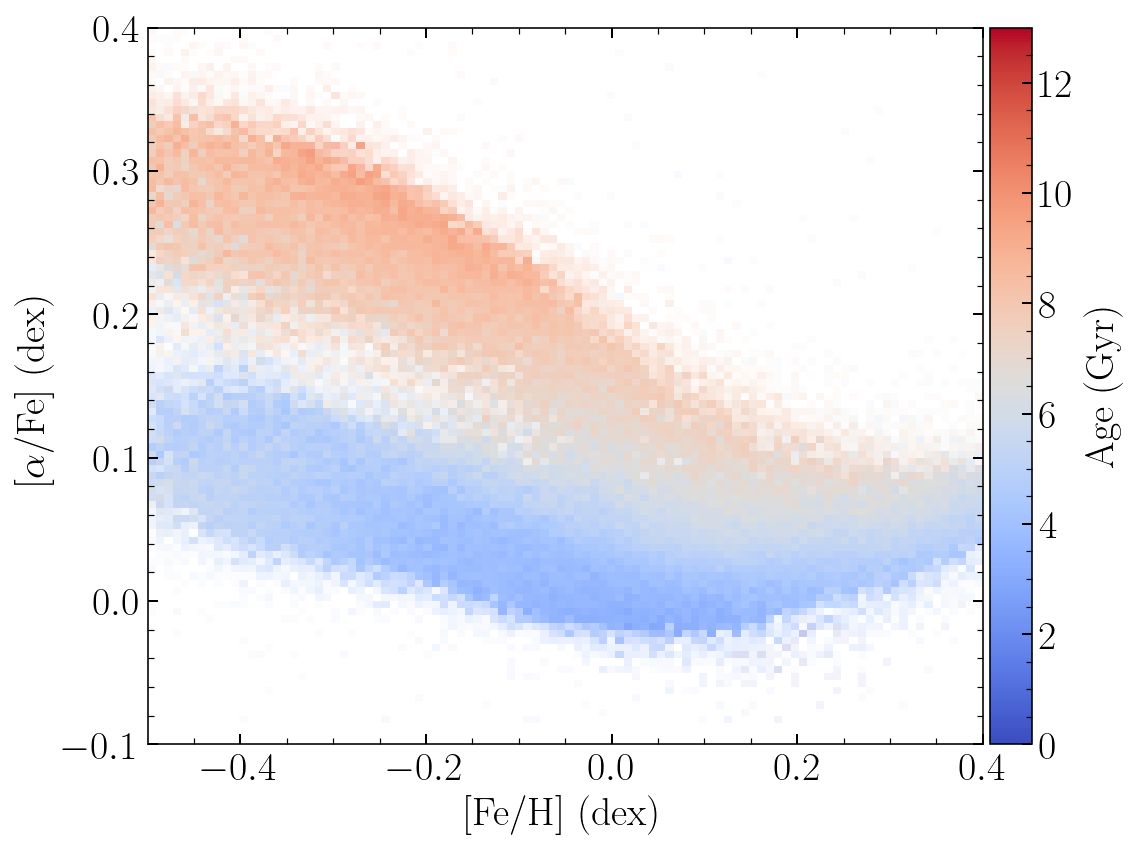

In [5]:
import matplotlib as mpl
from astroNN.apogee import apogee_astronn
from astroNN.shared.matplotlib import pylab_style
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import binned_statistic_2d

pylab_style(paper=True)

f = fits.getdata(apogee_astronn(dr=16))

good_idx = (f["logg_err"] < 0.12) & (f["age_model_error"] / f["age"] < 0.2)
f = f[good_idx]

alpha = f["mg_h"] - f["fe_h"]
fe_h = f["fe_h"]
age = f["age"]

fig = plt.figure(figsize=(8.0, 6.0))
ax1 = fig.gca()

med, xe, ye, binnum = binned_statistic_2d(
    fe_h,
    alpha,
    age,
    bins=[100, 100],
    range=((-0.5, 0.4), (-0.1, 0.4)),
    statistic=np.median,
)

count, _, _, binnum = binned_statistic_2d(
    fe_h,
    alpha,
    age,
    bins=[100, 100],
    range=((-0.5, 0.4), (-0.1, 0.4)),
    statistic="count",
)

# plt.hist2d(z, vz, range=((-1, 1), (-60, 60)), bins=(100, 100))
# plt.scatter(z, vz, c=vphi, s=1)
mappable = ax1.pcolormesh(
    xe,
    ye,
    med.T,
    alpha=np.clip(count.T / np.percentile(count, 70), 0.0, 1.0),
    vmin=0,
    vmax=13,
    cmap="coolwarm",
)

mappable = ax1.pcolormesh(
    xe,
    ye,
    med.T,
    alpha=0.0,
    vmin=0,
    vmax=13,
    cmap="coolwarm",
)

ax1.set_ylabel(r"[$\alpha$/Fe] (dex)")
ax1.set_xlabel("[Fe/H] (dex)")
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)

cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=0, vmax=13)
cbar = plt.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation="vertical"
)

cbar.ax.tick_params()
cbar.set_label("Age (Gyr)")
fig.tight_layout()
fig.savefig("alpha_age.pdf")

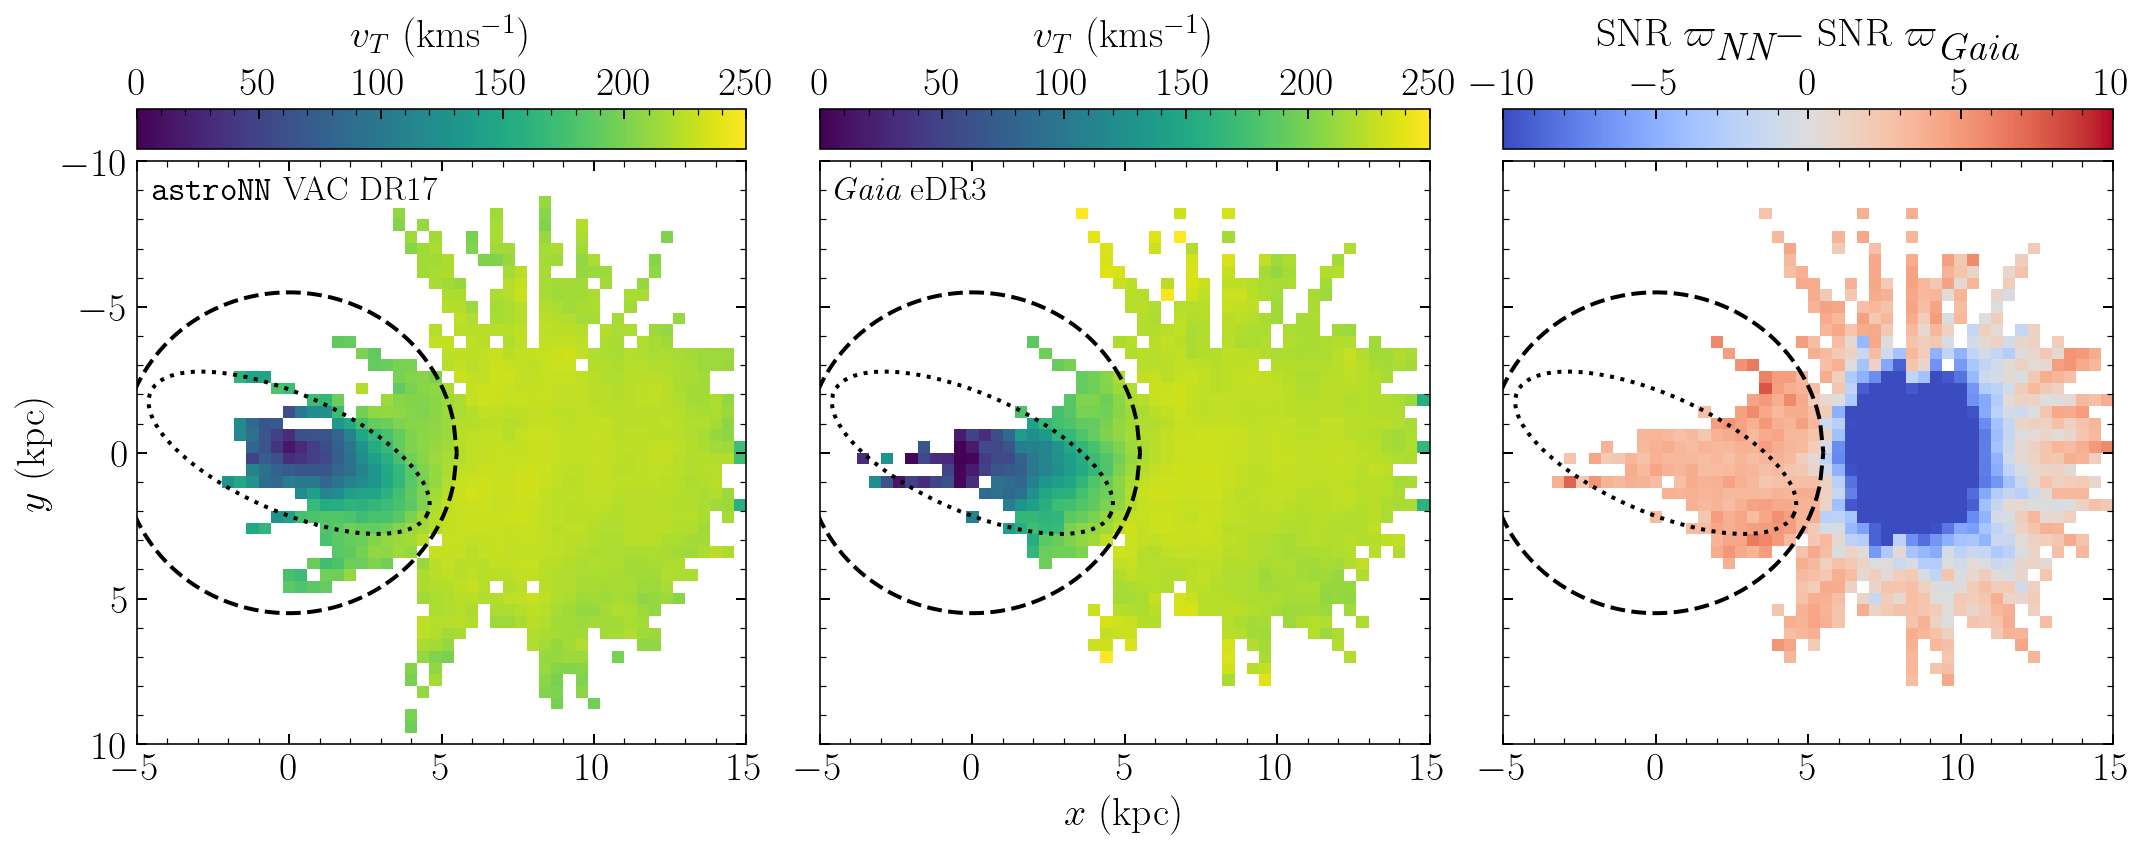

In [7]:
import matplotlib as mpl
from astroNN.apogee import apogee_astronn
from astroNN.shared.matplotlib import pylab_style
from astropy.convolution import Gaussian1DKernel, Gaussian2DKernel, convolve
from astropy.coordinates import CartesianDifferential, Galactocentric, SkyCoord
from astropy.io import fits
import astropy.units as u
from astropy.modeling import fitting, models
from galpy.util import coords
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import binned_statistic_2d

pylab_style(paper=True)

f_astroNN = fits.getdata(apogee_astronn(dr=17))
f_gaia = fits.getdata("../apogeework/apogeedr17_syncspec_gaiaedr3_xmatch.fits")

R0 = 8.275 * u.kpc
v0 = [11.1, 252.0, 7.25] * u.km / u.s
z0 = 20.8 * u.pc
bar_angle = 25. / 180.0 * np.pi

def bar_overlay(ax, angle=bar_angle):
    # ax.axvline(0.0, ls="--", c="r", lw=2)
    # ax.axhline(0.0, ls="--", c="r", lw=2)
    ax.set_xlim(-5.0, 15.0)
    ax.set_ylim(10.0, -10.0)
    radius = 5.5
    xs = np.linspace(-radius, radius, 101)
    ax.plot(xs, np.sqrt(radius ** 2.0 - xs ** 2.0), "k--", lw=2)
    ax.plot(xs, -np.sqrt(radius ** 2.0 - xs ** 2.0), "k--", lw=2)
    bar_radius = 5.0
    axis_ratio = 0.4
    ts = np.linspace(0.0, 2.0 * np.pi, 101)
    ax.plot(
        bar_radius * np.cos(ts) * np.cos(angle)
        - bar_radius * axis_ratio * np.sin(ts) * np.sin(angle),
        bar_radius * np.cos(ts) * np.sin(angle)
        + bar_radius * axis_ratio * np.sin(ts) * np.cos(angle),
        "k:",
        lw=2,
    )
    # plot major axis here
    # ax.plot(
    #     [-bar_radius * np.cos(angle), bar_radius * np.cos(angle)],
    #     [-bar_radius * np.sin(angle), bar_radius * np.sin(angle)],
    #     "k:",
    #     lw=2,
    # )
    # plot minor axis here
    # ax.plot(
    #     [
    #         -axis_ratio * bar_radius * np.cos(np.pi / 2 + angle),
    #         axis_ratio * bar_radius * np.cos(np.pi / 2 + angle),
    #     ],
    #     [
    #         -axis_ratio * bar_radius * np.sin(np.pi / 2 + angle),
    #         axis_ratio * bar_radius * np.sin(np.pi / 2 + angle),
    #     ],
    #     "k:",
    #     lw=2,
    # )

good_idx = (
    (~np.isnan(f_astroNN["dist"]))
    & (f_astroNN["dist"] > 0.0)
    & (f_astroNN["logg_err"] < 0.15)
    & (f_astroNN["logg"] > 0.8)
    & (f_astroNN["logg"] < 3.5)
    & (~np.isnan(f_astroNN["pmra"]))
    & (~np.isnan(f_astroNN["pmra"]))
    & (f_gaia["ruwe"] < 1.4)
    & (np.fabs(f_astroNN["galz"]) < 0.5)
)

f_astroNN = f_astroNN[good_idx]
f_gaia = f_gaia[good_idx]

skyc = SkyCoord(
    ra=f_astroNN["RA"] * u.deg,
    dec=f_astroNN["DEC"] * u.deg,
    distance=f_astroNN["dist"] * u.pc,
    pm_ra_cosdec=f_astroNN["pmra"] * u.mas / u.yr,
    pm_dec=f_astroNN["pmdec"] * u.mas / u.yr,
    radial_velocity=f_astroNN["VHELIO_AVG"] * u.km / u.s,
)

good_gaia_idx = (f_gaia["parallax_w_zp"] / f_gaia["parallax_error"] > 1)

skyc_gaia = SkyCoord(
    ra=f_astroNN["RA"][good_gaia_idx] * u.deg,
    dec=f_astroNN["DEC"][good_gaia_idx] * u.deg,
    distance=1/f_gaia["parallax_w_zp"][good_gaia_idx] * u.kpc,
    pm_ra_cosdec=f_astroNN["pmra"][good_gaia_idx] * u.mas / u.yr,
    pm_dec=f_astroNN["pmdec"][good_gaia_idx] * u.mas / u.yr,
    radial_velocity=f_astroNN["VHELIO_AVG"][good_gaia_idx] * u.km / u.s,
)


v_sun = CartesianDifferential(v0)
gc_frame = Galactocentric(galcen_distance=R0, z_sun=z0, galcen_v_sun=v_sun)

gc = skyc.transform_to(gc_frame)
gc.representation_type = "cylindrical"
gc_gaia = skyc_gaia.transform_to(gc_frame)
gc_gaia.representation_type = "cylindrical"

data = np.vstack(
    [
        -gc.cartesian.x.to(u.kpc).value,
        gc.cartesian.y.to(u.kpc).value,
        gc.cartesian.z.to(u.kpc).value,
        -gc.velocity.d_x.value,
        gc.velocity.d_y.value,
        gc.velocity.d_z.value,
    ]
).T

data_gaia = np.vstack(
    [
        -gc_gaia.cartesian.x.to(u.kpc).value,
        gc_gaia.cartesian.y.to(u.kpc).value,
        gc_gaia.cartesian.z.to(u.kpc).value,
        -gc_gaia.velocity.d_x.value,
        gc_gaia.velocity.d_y.value,
        gc_gaia.velocity.d_z.value,
    ]
).T

# x, y
data[:, 1] *= -1
data_gaia[:, 1] *= -1

# vx, vy
data[:, 4] *= -1
data_gaia[:, 4] *= -1

x = data[:, 0]
y = -data[:, 1]
z = data[:, 2]
vx = data[:, 3]
vy = -data[:, 4]
vz = data[:, 5]
dR, dphi, dz = coords.rect_to_cyl(x, y, z)
dvR, dvT, dvz = coords.rect_to_cyl_vec(vx, vy, vz, dR, dphi, dz, cyl=True)
R = dR
phi = dphi
Z = dz
vR = dvR
vT = dvT
vz = dvz

range=[[-5., 15.], [-10., 10.]]
bins=[50, 50]

N, xe, ye, binnumber = binned_statistic_2d(
    dR * np.cos(dphi),
    dR * np.sin(dphi),
    dvT,
    statistic="count",
    bins=bins,
    range=range,
)

binned_vT = binned_statistic_2d(
    dR * np.cos(dphi),
    dR * np.sin(dphi),
    dvT,
    statistic="median",
    bins=bins,
    range=range,
)[0]

binned_vR = binned_statistic_2d(
    dR * np.cos(dphi),
    dR * np.sin(dphi),
    dvR,
    statistic="median",
    bins=bins,
    range=range,
)[0]

binned_vTR = binned_statistic_2d(
    dR * np.cos(dphi),
    dR * np.sin(dphi),
    dvT / dR,
    statistic="median",
    bins=bins,
    range=range,
)[0]

binned_vT[N < 10] = np.nan
binned_vR[N < 10] = np.nan
binned_vTR[N < 10] = np.nan

binned_vT = convolve(binned_vT, Gaussian2DKernel(x_stddev=0.625), preserve_nan=True)
binned_vR = convolve(binned_vR, Gaussian2DKernel(x_stddev=0.625), preserve_nan=True)
binned_vTR = convolve(binned_vTR, Gaussian2DKernel(x_stddev=0.625), preserve_nan=True)

binned_vT[N < 10] = np.nan
binned_vR[N < 10] = np.nan
binned_vTR[N < 10] = np.nan

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

mappable = ax1.pcolormesh(
    xe,
    ye,
    binned_vT.T,
    vmin=0,
    vmax=250,
)
bar_overlay(ax1)
ax_divider = make_axes_locatable(ax1)
cax = ax_divider.append_axes("top", size="7%", pad="2%")
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label(r"$v_T\ (\mathrm{km s^{-1}})$", labelpad=10)
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")

ax1.set_ylabel("$y\ (\mathrm{kpc})$")
ax2.set_xlabel("$x\ (\mathrm{kpc})$")
ax1.text(
    -4.5,
    -9.5,
    r"$\texttt{astroNN}\mathrm{\ VAC\ DR17}$",
    fontsize=17,
    ha="left",
    va="top",
)
ax2.text(
    -4.5,
    -9.5,
    r"$\emph{Gaia}\ \mathrm{eDR3}$ ",
    fontsize=17,
    ha="left",
    va="top",
)
########################
x = data_gaia[:, 0]
y = -data_gaia[:, 1]
z = data_gaia[:, 2]
vx = data_gaia[:, 3]
vy = -data_gaia[:, 4]
vz = data_gaia[:, 5]
dR, dphi, dz = coords.rect_to_cyl(x, y, z)
dvR, dvT, dvz = coords.rect_to_cyl_vec(vx, vy, vz, dR, dphi, dz, cyl=True)
R = dR
phi = dphi
Z = dz
vR = dvR
vT = dvT
vz = dvz

range=[[-5., 15.], [-10., 10.]]
bins=[50, 50]

N, xe, ye, binnumber = binned_statistic_2d(
    dR * np.cos(dphi),
    dR * np.sin(dphi),
    dvT,
    statistic="count",
    bins=bins,
    range=range,
)

binned_vT = binned_statistic_2d(
    dR * np.cos(dphi),
    dR * np.sin(dphi),
    dvT,
    statistic="median",
    bins=bins,
    range=range,
)[0]

binned_vT[N < 10] = np.nan
binned_vT = convolve(binned_vT, Gaussian2DKernel(x_stddev=0.625), preserve_nan=True)
binned_vT[N < 10] = np.nan

########################

mappable = ax2.pcolormesh(
    xe,
    ye,
    binned_vT.T,
    vmin=0,
    vmax=250,
)
bar_overlay(ax2)
ax_divider = make_axes_locatable(ax2)
cax = ax_divider.append_axes("top", size="7%", pad="2%")
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label(r"$v_T\ (\mathrm{km s^{-1}})$", labelpad=10)
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")
ax2.set_yticklabels([])
########################

binned_SNR = binned_statistic_2d(
    data[:, 0][good_gaia_idx],
    -data[:, 1][good_gaia_idx],
    (f_astroNN["nn_parallax"][good_gaia_idx]/f_astroNN["nn_parallax_error"][good_gaia_idx]) - (f_gaia["parallax"][good_gaia_idx]/f_gaia["parallax_error"][good_gaia_idx]),
    statistic="median",
    bins=bins,
    range=range,
)[0]

binned_SNR[N < 10] = np.nan

# mappable = ax3.scatter(
#     data[:, 0][good_gaia_idx],
#     -data[:, 1][good_gaia_idx],
#     c=(f_astroNN["nn_parallax"][good_gaia_idx]/f_astroNN["nn_parallax_error"][good_gaia_idx]) - (f_gaia["parallax"][good_gaia_idx]/f_gaia["parallax_error"][good_gaia_idx]),
#     s=1,
#     vmin=-10,
#     vmax=10,
#     cmap="coolwarm"
# )
mappable = ax3.pcolormesh(
    xe,
    ye,
    binned_SNR.T,
    vmin=-10,
    vmax=10,
    cmap="coolwarm"
)
bar_overlay(ax3)
ax_divider = make_axes_locatable(ax3)
cax = ax_divider.append_axes("top", size="7%", pad="2%")
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label(r"SNR $\varpi_\emph{NN}-$ SNR $\varpi_\emph{Gaia}$", labelpad=10)
cax.xaxis.set_ticks_position("top")
cax.xaxis.set_label_position("top")
ax3.set_yticklabels([])

fig.tight_layout()
fig.savefig("kinematics.pdf")